<a href="https://colab.research.google.com/github/mrinmoy-sadhukhan/AI-mask/blob/main/Project_final_with_all_model_and_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.version
!pip install keras-applications

     |████████████████████████████████| 51kB 4.3MB/s 


In [ ]:
%cd /content/drive/My Drive/kaggle

/content/drive/My Drive/kaggle


In [ ]:
! pip install -q kaggle
from google.colab import files

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/kaggle"

In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 11.5MB/s 


### Import

In [ ]:
!pip install visualkeras

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
import visualkeras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
import os

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
 
import warnings
warnings.filterwarnings('ignore')
 
from sklearn.model_selection import train_test_split
import itertools
 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, concatenate, Input, Conv2D, MaxPooling2D,DepthwiseConv2D
from keras.layers import Dense, Activation, Flatten, Dropout, concatenate, Input, Conv2D, MaxPooling2D,Conv2D, BatchNormalization, ReLU, concatenate, AveragePooling2D, Add, GlobalMaxPooling2D,Dropout, Flatten, Dense
from keras.optimizers import Adam, Adadelta
from keras.layers.advanced_activations import LeakyReLU,ReLU
from keras.utils.np_utils import to_categorical
import mahotas
from matplotlib import pyplot
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import argparse
import cv2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os
from sklearn.preprocessing import MinMaxScaler
import h5py
import joblib
from matplotlib import pyplot
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pickle

### Model saving Path

In [ ]:
MobileNetV_2='mask_final/mobilenetv2.h5'
scratchv2_weight='mask_final/scratchv2_weight.h5'
scratchv2='mask_final/scratchv2.h5'
scratchv2_model='mask_final/scratchv2_model.h5'
data2 = 'mask_final/trainx.h5' ##it is trainx data
data1 = 'mask_final/trainx1.h5'
labels = 'mask_finals/labels.h5'
mobilesvm='mask_final/mobilesvm.sav'
mobilexgboost='mask_final/mobilexgboost.sav'
mobilerf='mask_final/mobilerf.sav'
scalerpath = 'mask_final/scaler.sav'
scratchsvm='mask_final/scratchsvm.sav'
scratchxgboost='mask_final/scratchxgboost.sav'
scratchrf='mask_final/scratchrf.sav'
mobilelbmsvm='mask_final/mobilelbmsvm.sav'
mobilelbmxgboost='mask_final/mobilelbmxgboost.sav'
mobilelbmrf='mask_final/mobilelbmrf.sav'
scratchlbmsvm='mask_final/scratchlbmsvm.sav'
scratchlbmxgboost='mask_final/scratchlbmxgboost.sav'
scratchlbmrf='mask_final/scratchlbmrf.sav'
pcadata = "mask_final/pca_transform.pkl"
labelencoderdata = 'mask_final/labelencoderBinarizer.cpickle'

### Starting of Model building



In [ ]:
base_path = 'mask_unzippeed_folder/dataset'
categories = ['incorrect_mask','with_mask','without_mask']
#categories = ['with_mask','without_mask']

In [ ]:
from skimage import feature
import numpy as np
 
 
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
 
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints,
                                           self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
                                 bins=np.arange(0, self.numPoints + 3),
                                 range=(0, self.numPoints + 2))
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        return hist

In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
epochs=100

In [ ]:
desc = LocalBinaryPatterns(24, 8)

In [ ]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature
 
 
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

In [ ]:
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/kaggle/deploy.prototxt.txt','/content/drive/MyDrive/kaggle/res10_300x300_ssd_iter_140000.caffemodel')

[INFO] loading model...


In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
 
bins = 8
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(base_path))
#data1=[]
data = []
labels = []
global_features = []
# loop over the image paths
for imagePath in imagePaths:
  label = imagePath.split(os.path.sep)[-2]
  print(label,imagePath)
  image = load_img(imagePath, target_size=(224,224))
  image1=cv2.resize(cv2.imread(imagePath),(224,224), interpolation=cv2.INTER_LINEAR)
  image = img_to_array(image)
  #image2=preprocess_input(image)
  image = np.expand_dims(image, axis=0)
  image = preprocess_input(image)
  ##
  fv_hu_moments = fd_hu_moments(image1)
  fv_haralick = fd_haralick(image1)
  img_gray_1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  fv_hist_LBP = desc.describe(img_gray_1)
  ###################################
  # Concatenate global features
  ###################################
  global_feature = np.hstack([fv_hist_LBP,fv_hu_moments,fv_haralick])
  # print(global_feature.shape)
  # update the list of labels and feature vectors
  global_features.append(global_feature)
  data.append(image)
 # data1.append(image2)
  labels.append(label)
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
#data1=np.array(data1,dtype="float32")
global_features=np.array(global_features,dtype="float32")
labels = np.array(labels)
print(data.shape)
#print(data1.shape)
print(labels.shape)
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#labels = to_categorical(labels,num_classes=len(categories))
print(labels.shape)

[INFO] loading images...
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_1.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_10.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_100.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_101.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_102.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_103.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_104.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_106.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_107.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_105.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_108.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_114.jpg
incorrect_mask mask_unzippeed_folder/dataset/incorrect_mask/aug_110.jpg
incorrect_mask mask_unzippeed_folder/datas

In [ ]:
print(global_features.shape)

(2079, 46)


## Model Building

In [ ]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")
 
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
 
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)
 
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
 
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False
 
model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________

In [ ]:
from keras import backend as K 
def scratchModel(inclued_top='true'):
  def relu6(x):
    """Relu 6
    """
    return K.relu(x, max_value=6.0)
  def fire_hee(x,first_filter,output_filter):
    x=Conv2D(first_filter,(1,1),strides=(1,1),padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation(relu6)(x)
    x =DepthwiseConv2D((3,3),strides=(1,1),depth_multiplier=1, padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation(relu6)(x)
    x=Conv2D(output_filter,(1,1),padding='same',strides=(1,1))(x)
    return x
  def fire_intercept(x,fire=64):
    left=Conv2D(fire,(1,1),padding='valid',strides=(1,1))(x)
    left=ReLU()(left)

    right=Conv2D(fire,(3,3),padding='same',strides=(1,1))(x)
    right=ReLU()(right)
    x=concatenate([left,right],axis=3)
    return x

  input_shape=(224,224,3)
  image_input=Input(shape=input_shape)
  x=Conv2D(32,(3,3),strides=(2,2), padding='same')(image_input)
  x=BatchNormalization()(x)
  x=Activation(relu6)(x)

  x=DepthwiseConv2D((3,3),strides=(1,1),depth_multiplier=1, padding='same')(x)
  x=BatchNormalization()(x)
  x=Activation(relu6)(x)

  x=Conv2D(32,(1,1),strides=(1,1),padding='same')(x)
  x=BatchNormalization()(x)
  x1=fire_hee(x,first_filter=144,output_filter=32)
  x=Add()([x,x1])
  x=Conv2D(144,(1,1),strides=(1,1),padding='same')(x)
  x=BatchNormalization()(x)
  x=Activation(relu6)(x)
  x=Conv2D(32,(1,1),strides=(1,1),padding='same')(x)
  x=Activation(relu6)(x)
  x=fire_intercept(x,fire=128)
  x=Conv2D(32,(1,1),strides=(1,1),padding='same')(x)
  x=BatchNormalization()(x)
  x=Activation(relu6)(x)
  x=DepthwiseConv2D((3,3),strides=(2,2),depth_multiplier=1, padding='same')(x)
  x=BatchNormalization()(x)
  x=Conv2D(64,(1,1),strides=(1,1),padding='same')(x)
  x=BatchNormalization()(x)

  x1=fire_hee(x,first_filter=384,output_filter=64)
  x=Add()([x,x1])
  x=Conv2D(384,(1,1),strides=(1,1),padding='same')(x)
  x=BatchNormalization()(x)
  x=Activation(relu6)(x)
  x=Conv2D(64,(1,1),strides=(1,1),padding='same')(x)
  x=Activation(relu6)(x)
  x=fire_intercept(x,fire=256)
  x=Conv2D(64,(1,1),strides=(1,1),padding='same')(x)
  x=BatchNormalization()(x)
  x=Activation(relu6)(x)
  x=DepthwiseConv2D((3,3),strides=(2,2),depth_multiplier=1, padding='same')(x)
  x=BatchNormalization()(x)
  x=Conv2D(160,(1,1),strides=(1,1),padding='same')(x)
  x=BatchNormalization()(x)

  x1=fire_hee(x,first_filter=960,output_filter=160)
  x=Add()([x,x1])
  x=Conv2D(960,(1,1),strides=(1,1),padding='same')(x)
  x=BatchNormalization()(x)
  x=Activation(relu6)(x)
  x=Conv2D(160,(1,1),strides=(1,1),padding='same')(x)
  x=Activation(relu6)(x)
  x=fire_intercept(x,fire=640)
  x=Conv2D(160,(1,1),strides=(1,1),padding='same')(x)
  x=BatchNormalization()(x)
  x=Activation(relu6)(x)
  x=DepthwiseConv2D((3,3),strides=(2,2),depth_multiplier=1, padding='same')(x)
  x=BatchNormalization()(x)
  x=Conv2D(320,(1,1),strides=(1,1),padding='same')(x)
  x=BatchNormalization()(x)


  x=DepthwiseConv2D((3,3),strides=(2,2),depth_multiplier=1, padding='same')(x)
  x=BatchNormalization()(x)

  x=Conv2D(1280,(1,1),strides=(1,1),padding='same')(x)
  x=BatchNormalization()(x)
 
  if inclued_top == 'true':
    # x=AveragePooling2D(pool_size=(7,7),strides=(7,7),padding='same')(x)
    x=GlobalMaxPooling2D()(x)
    x=Dropout(rate=0.5)(x)
    x=Flatten()(x)
    x=Dense(512,activation="relu")(x)
    x=Dropout(0.5)(x)
    out=Dense(3,activation="softmax")(x)
    scratchmodel=Model(image_input,out)
  else:
    scratchmodel=Model(image_input,x)
  return scratchmodel

## Pretrained Own model Loading

In [ ]:
import tensorflow as tf
from keras import backend as K
def relu6(x):
    """Relu 6
    """
    return K.relu(x, max_value=6.0)
tf.keras.utils.get_custom_objects().update({'relu6': relu6})
load_model=load_model('/content/drive/MyDrive/kaggle/scratch_train1.model')

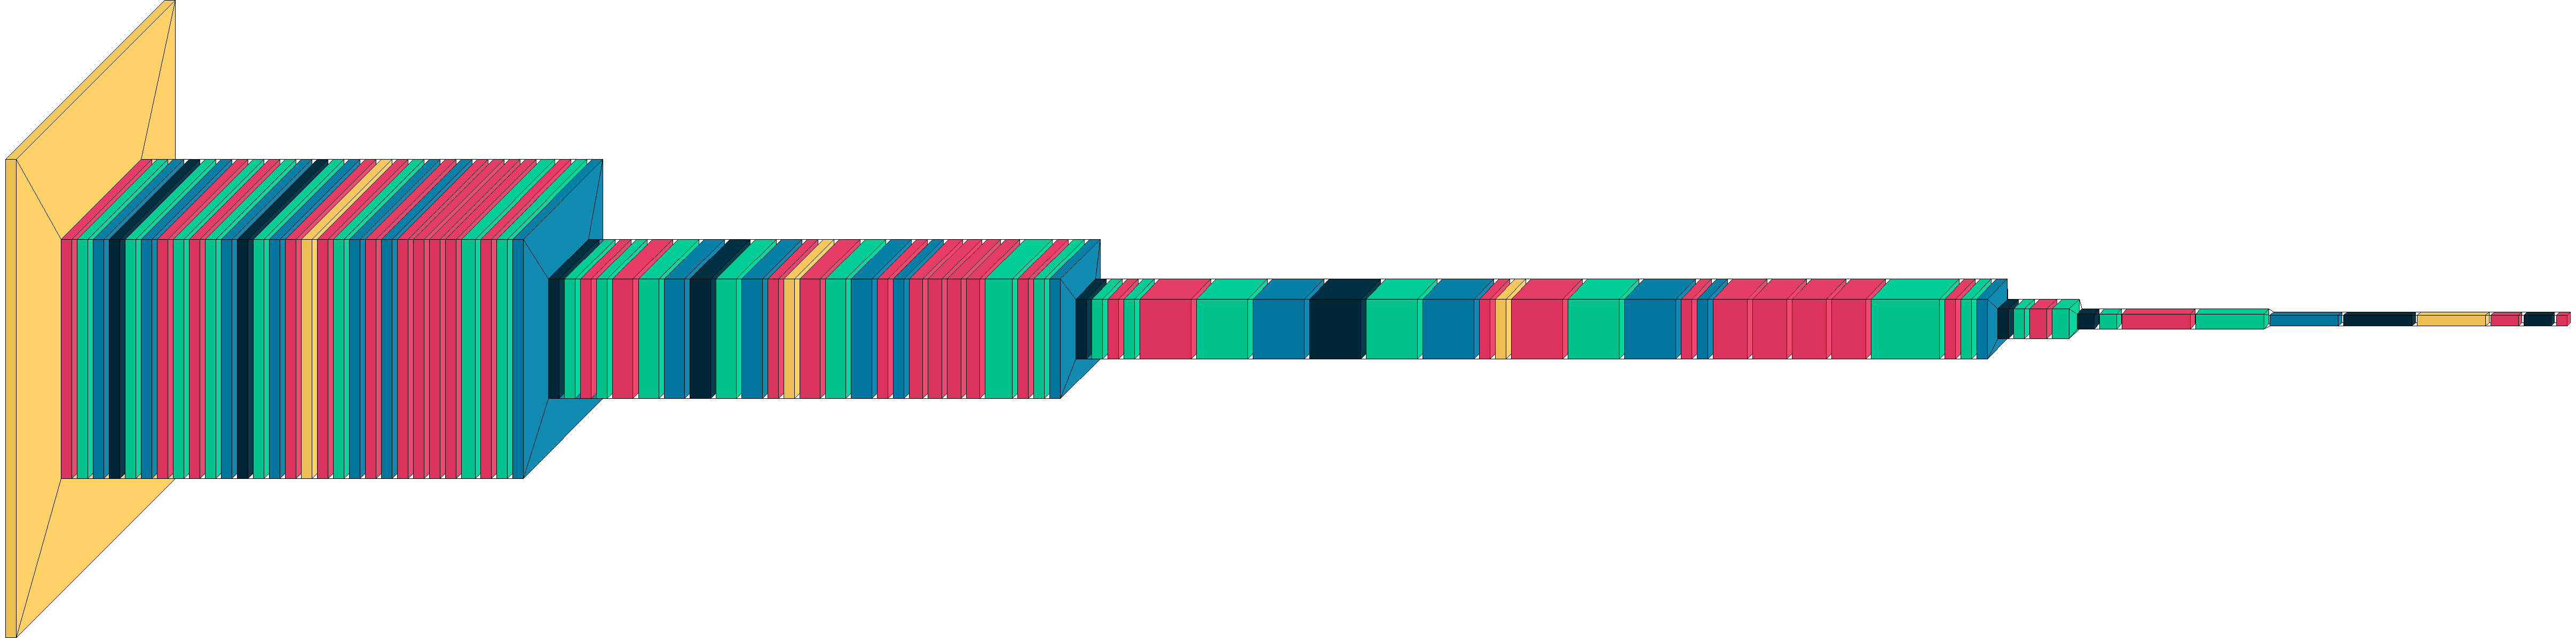

In [ ]:
visualkeras.layered_view(load_model)

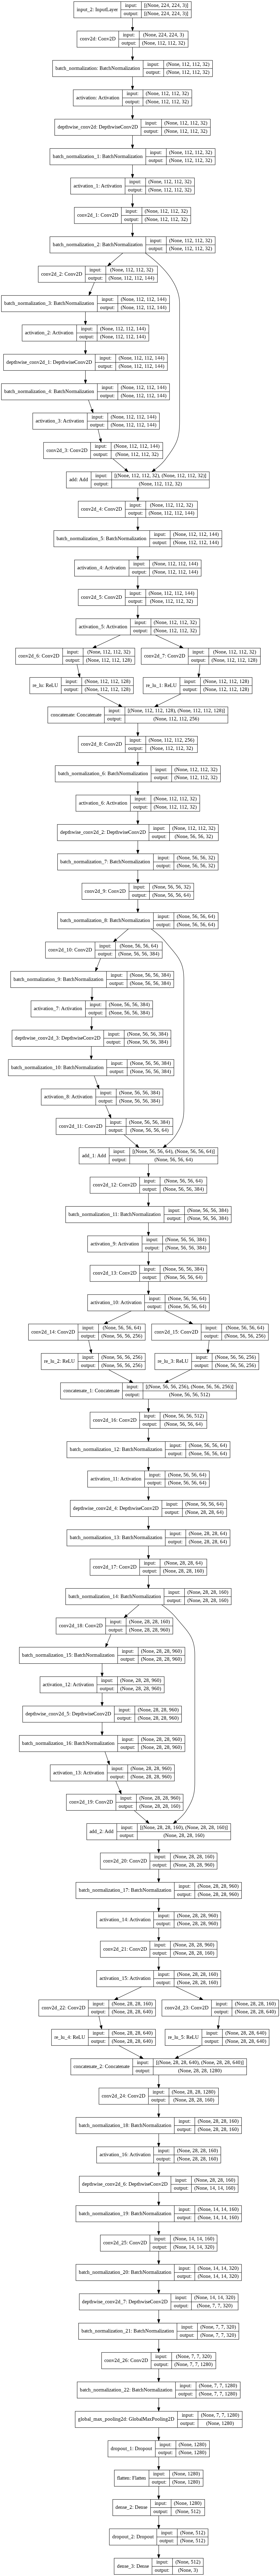

In [ ]:
tf.keras.utils.plot_model(load_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
load_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
load_model.summary()
hidden_layer = load_model.layers[-7].output
new_output = ReLU(name="out_relu") (hidden_layer)
# Build a new model
model2 = Model(load_model.input, new_output)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
def copyModel2Model(model_source,model_target,certain_layer=""):        
    for l_tg,l_sr in zip(model_target.layers,model_source.layers):
        wk0=l_sr.get_weights()
        l_tg.set_weights(wk0)
        if l_tg.name==certain_layer:
            break
    print("model source was copied into model target") 
copyModel2Model(load_model,model2,"global_max_pooling2d (GlobalMaxPolling2D")

model source was copied into model target


In [ ]:
model2.get_weights()

[array([[[[-8.96941200e-02,  1.18302532e-01,  9.97705534e-02,
            3.59577104e-03,  8.85985643e-02, -3.25168967e-02,
            1.19054824e-01,  1.33955210e-01,  5.79661876e-02,
           -3.45150530e-02, -6.80415481e-02, -2.48243157e-02,
           -1.06416851e-01,  2.72810869e-02,  8.49731714e-02,
           -3.11969314e-02, -7.36643653e-03,  3.97356711e-02,
            9.89628658e-02,  1.74833480e-02, -5.95926605e-02,
           -5.05232438e-02, -7.86292553e-02,  9.94749516e-02,
           -8.27010348e-03, -9.78466049e-02, -1.15844645e-01,
           -1.16386101e-01,  7.07234740e-02,  1.00654051e-01,
            1.99505016e-02,  2.78683398e-02],
          [-2.74460223e-02, -1.07797891e-01, -3.34191620e-02,
            9.33706462e-02,  1.22424178e-01, -8.97992849e-02,
            3.93425450e-02,  1.36446133e-01, -9.54191759e-02,
            9.27609019e-03,  1.92116713e-03,  5.12418803e-03,
           -3.59350666e-02,  4.95969094e-02, -3.80975939e-02,
           -1.01960011e-

In [ ]:
trainx= np.vstack(data)
trainx = baseModel.predict(trainx) ##mobilenet head=basemodel
print(trainx.shape)
trainx = trainx.reshape((trainx.shape[0], 7 * 7 * 1280))
print(trainx.shape)

(2079, 7, 7, 1280)
(2079, 62720)


In [ ]:
trainx=np.concatenate((trainx,global_features),axis=1)

In [ ]:
print(trainx.shape)

(2079, 62766)


In [ ]:
(train_x, test_X, train_y, test_Y) = train_test_split(data1, labels,test_size=0.20, stratify=labels, random_state=42)
(train_X,val_X,train_Y,val_Y)=train_test_split(train_x,train_y,test_size=0.10,random_state=42)

## Model Training if create new one

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(train_X, train_Y, batch_size=BS),
	steps_per_epoch=len(train_X) // BS,
	validation_data=(test_X, test_Y),
	validation_steps=len(test_X) // BS,
	epochs=EPOCHS)

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_X, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(test_Y.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save(MobileNetV_2)
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("MobilenetV2 Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('/content/drive/MyDrive/kaggle/mask_final/plot1.png')
plt.close()

[INFO] training head...
Epoch 1/20
46/46 [==============================] - 18s 348ms/step - loss: 1.2157 - accuracy: 0.3681 - val_loss: 0.9888 - val_accuracy: 0.5168
Epoch 2/20
46/46 [==============================] - 15s 322ms/step - loss: 1.0983 - accuracy: 0.4169 - val_loss: 0.9621 - val_accuracy: 0.4904
Epoch 3/20
46/46 [==============================] - 15s 324ms/step - loss: 1.0586 - accuracy: 0.4578 - val_loss: 0.8992 - val_accuracy: 0.5962
Epoch 4/20
46/46 [==============================] - 15s 324ms/step - loss: 1.0212 - accuracy: 0.4704 - val_loss: 0.8743 - val_accuracy: 0.6298
Epoch 5/20
46/46 [==============================] - 15s 326ms/step - loss: 0.9798 - accuracy: 0.5120 - val_loss: 0.8501 - val_accuracy: 0.6346
Epoch 6/20
46/46 [==============================] - 15s 324ms/step - loss: 0.9420 - accuracy: 0.5750 - val_loss: 0.8380 - val_accuracy: 0.6154
Epoch 7/20
46/46 [==============================] - 15s 323ms/step - loss: 0.9595 - accuracy: 0.5507 - val_loss: 0.824

In [ ]:
#opt = Adam(lr=INIT_LR, decay=INIT_LR / epochs)
opt = SGD(lr=1e-2, momentum=0.9, decay=1e-2/epochs)
scratchmodel=scratchModel(inclued_top='true')
scratchmodel.summary()
scratchmodel.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = scratchmodel.fit(
	aug.flow(train_X, train_Y, batch_size=BS),
	steps_per_epoch=len(train_X) // BS,
	validation_data=(test_X, test_Y),
	validation_steps=len(test_X) // BS,
	epochs=epochs)

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = scratchmodel.predict(test_X, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(test_Y.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
scratchmodel.save(scratchv2)
#scratchmodel.save_model(scratchv2_model)
#scratchmodel.save_weights(scratchv2_weight)

# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("scratch model Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('/content/drive/MyDrive/kaggle/mask_final/plot2.png')
plt.close()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

AttributeError: ignored

## Frome Here machine learning Part starts

[[[[-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   ...
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]]

  [[-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   ...
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]]

  [[-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   ...
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]]

  ...

  [[-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   ...
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 

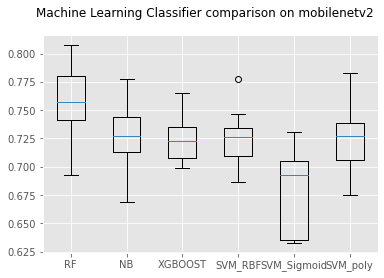

In [ ]:
model_feat = Model(inputs=model.input,outputs=model.get_layer('dense_1').output) ###dense layer name will be changed
print(train_x)
print(train_x.shape)
feat_train = model_feat.predict(train_x,batch_size=BS)
print(feat_train.shape)
print(feat_train)
feat_test = model_feat.predict(test_X)
print(feat_test.shape)

num_trees = 100
seed = 9
scoring = "accuracy"
results=[]
models = []
names=[]
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('XGBOOST', xgb.XGBClassifier()))
models.append(('SVM_RBF', SVC(kernel='rbf',random_state=seed)))
models.append(('SVM_Sigmoid',SVC(kernel='sigmoid',random_state=seed)))
models.append(('SVM_poly',SVC(kernel='poly',random_state=seed)))


# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, feat_train, np.argmax(train_y,axis=1), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning Classifier comparison on mobilenetv2')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.savefig('/content/drive/MyDrive/kaggle/mask_final/plot3.png')
pyplot.show()
pyplot.close()

from sklearn.svm import SVC
svm = SVC(kernel='sigmoid')
svm.fit(feat_train,np.argmax(train_y,axis=1))
pickle.dump(svm,open(mobilesvm,'wb'))
import xgboost as xgb
xb = xgb.XGBClassifier()
xb.fit(feat_train,np.argmax(train_y,axis=1))
pickle.dump(xb,open(mobilexgboost,'wb'))
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
seed = 9
clf = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
clf.fit(feat_train,np.argmax(train_y,axis=1))
pickle.dump(clf,open(mobilerf,'wb'))

[[[[-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   ...
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]]

  [[-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   ...
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]]

  [[-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   ...
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]]

  ...

  [[-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   ...
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 -0.99215686 -0.99215686]
   [-0.99215686 

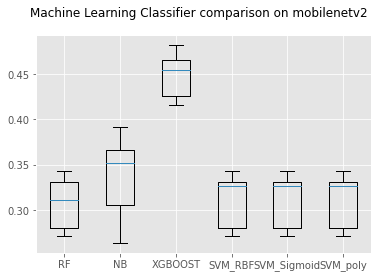

In [ ]:
model_feat = Model(inputs=scratchmodel.input,outputs=scratchmodel.get_layer('dense_3').output) ##dense_layer name will be changed
print(train_x)
print(train_x.shape)
feat_train = model_feat.predict(train_x,batch_size=BS)
print(feat_train.shape)
print(feat_train)
feat_test = model_feat.predict(test_X)
print(feat_test.shape)

num_trees = 100
seed = 9
scoring = "accuracy"
results=[]
models = []
names=[]
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('XGBOOST', xgb.XGBClassifier()))
models.append(('SVM_RBF', SVC(kernel='rbf',random_state=seed)))
models.append(('SVM_Sigmoid',SVC(kernel='sigmoid',random_state=seed)))
models.append(('SVM_poly',SVC(kernel='poly',random_state=seed)))


# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, feat_train, np.argmax(train_y,axis=1), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning Classifier comparison on mobilenetv2')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.savefig('/content/drive/MyDrive/kaggle/mask_final/plot4.png')
pyplot.show()
pyplot.close()

from sklearn.svm import SVC
svm = SVC(kernel='sigmoid')
svm.fit(feat_train,np.argmax(train_y,axis=1))
pickle.dump(svm,open(scratchsvm,'wb'))
import xgboost as xgb
xb = xgb.XGBClassifier()
xb.fit(feat_train,np.argmax(train_y,axis=1))
pickle.dump(xb,open(scratchxgboost,'wb'))
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
seed = 9
clf = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
clf.fit(feat_train,np.argmax(train_y,axis=1))
pickle.dump(clf,open(scratchrf,'wb'))

## Machine Learning + classification

In [ ]:
(trainX, testX,trainY, testY) = train_test_split(trainx, labels,test_size=0.20, stratify=labels, random_state=42)
#(trainX,valX,trainY,valY)=train_test_split(trainx1,trainy1,test_size=0.10,random_state=42)

Non PCA

In [ ]:
Xtrain=trainX
Xtest=testX
#Xval=valX

PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
trainX = pca.fit_transform(trainX)
testX = pca.transform(testX)
#valX=pca.transform(valX)
print(trainX.shape)
print(testX.shape)
#print(valX.shape)

(1663, 1663)
(416, 1663)


RF: 0.697558 (0.026719)
NB: 0.457052 (0.031094)
XGBOOST: 0.849672 (0.014204)
SVM_RBF: 0.508149 (0.025004)
SVM_Sigmoid: 0.343388 (0.037924)
SVM_poly: 0.471423 (0.046589)


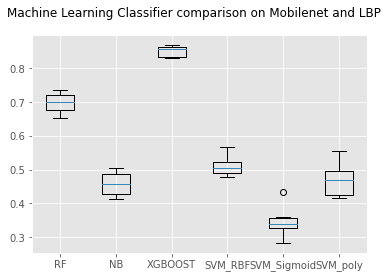

In [ ]:
num_trees = 100
seed = 9
scoring = "accuracy"
results=[]
models = []
names=[]
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('XGBOOST', xgb.XGBClassifier()))
models.append(('SVM_RBF', SVC(kernel='rbf',random_state=seed)))
models.append(('SVM_Sigmoid',SVC(kernel='sigmoid',random_state=seed)))
models.append(('SVM_poly',SVC(kernel='poly',random_state=seed)))


# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainX, np.argmax(trainY,axis=1), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning Classifier comparison on Mobilenet and LBP')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.savefig('/content/drive/MyDrive/kaggle/mask_final/plot5.png')
pyplot.show()
pyplot.close()
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid')
svm.fit(trainX,np.argmax(trainY,axis=1))
pickle.dump(svm,open(mobilelbmsvm,'wb'))
import xgboost as xgb
xb = xgb.XGBClassifier()
xb.fit(trainX,np.argmax(trainY,axis=1))
pickle.dump(xb,open(mobilelbmxgboost,'wb'))
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
seed = 9
clf = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
clf.fit(trainX,np.argmax(trainY,axis=1))
pickle.dump(clf,open(mobilelbmrf,'wb'))

In [ ]:
trainx2= np.vstack(data)
#scratchbaseModel=scratchModel(inclued_top='false')
trainx2 = model2.predict(trainx2)
print(trainx2.shape)
trainx2 = trainx2.reshape((trainx2.shape[0], 7 * 7 * 1280))
print(trainx2.shape)
trainx2=np.concatenate((trainx2,global_features),axis=1)
(trainX1, testX1,trainY1, testY1) = train_test_split(trainx2, labels,test_size=0.20, stratify=labels, random_state=42)
#(trainX1,valX1,trainY1,valY1)=train_test_split(train_x1,train_y1,test_size=0.10,random_state=10)

(2079, 7, 7, 1280)
(2079, 62720)


In [ ]:
print(trainx2.shape)

(2079, 62766)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
trainX1 = pca.fit_transform(trainX1)
testX1 = pca.transform(testX1)
#valX1=pca.transform(valX1)
print(trainX1.shape)
print(testX1.shape)
#print(valX1.shape)


(1663, 1663)
(416, 1663)


RF: 0.966925 (0.010500)
NB: 0.671099 (0.045269)
XGBOOST: 0.992183 (0.006611)
SVM_RBF: 0.527996 (0.023071)
SVM_Sigmoid: 0.343990 (0.039375)
SVM_poly: 0.540592 (0.053505)


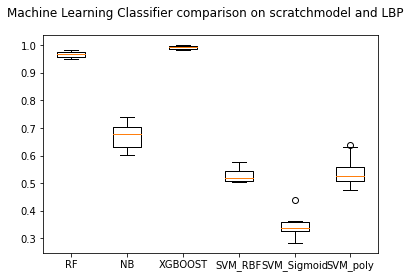

In [ ]:
num_trees = 100
seed = 9
scoring = "accuracy"
results=[]
models = []
names=[]
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('XGBOOST', xgb.XGBClassifier()))
models.append(('SVM_RBF', SVC(kernel='rbf',random_state=seed)))
models.append(('SVM_Sigmoid',SVC(kernel='sigmoid',random_state=seed)))
models.append(('SVM_poly',SVC(kernel='poly',random_state=seed)))


# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainX1, np.argmax(trainY1,axis=1), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning Classifier comparison on scratchmodel and LBP')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.savefig('/content/drive/MyDrive/kaggle/mask_final/plot6.png')
pyplot.show()
pyplot.close()
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid')
svm.fit(trainX1,np.argmax(trainY1,axis=1))
pickle.dump(svm,open(scratchlbmsvm,'wb'))
import xgboost as xgb
xb = xgb.XGBClassifier()
xb.fit(trainX1,np.argmax(trainY1,axis=1))
pickle.dump(xb,open(scratchlbmxgboost,'wb'))
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
seed = 9
clf = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
clf.fit(trainX1,np.argmax(trainY1,axis=1))
pickle.dump(clf,open(scratchlbmrf,'wb'))

In [ ]:
f=open(labelencoderdata,'wb')
f.write(pickle.dumps(lb))
f.close()
pickle.dump(pca,open(pcadata,'wb'))

In [ ]:
model2.save('maoo.h5',save_format="h5")

In [ ]:
!pwd

/content/drive/My Drive/kaggle


In [ ]:

scaler=MinMaxScaler(feature_range=(0,1))
trainx_rescaled_features=scaler.fit_transform(trainx)
trainx2_rescaled_features=scaler.transform(trainx2)
h5f_data=h5py.File(data2,'w')
h5f_data.create_dataset('dataset_1',data=np.array(trainx_rescaled_features))
h5f_data=h5py.File(data1,'w')
h5f_data.create_dataset('dataset_1',data=np.array(trainx2_rescaled_features))
joblib.dump(scaler,scalerpath)

['mask_final/scaler.sav']

In [ ]:
num_trees = 100
seed = 9
scoring = "accuracy"
models = []
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('XGBOOST', xgb.XGBClassifier()))
models.append(('SVM_RBF', SVC(kernel='rbf',random_state=seed)))
models.append(('SVM_Sigmoid',SVC(kernel='sigmoid',random_state=seed)))
models.append(('SVM_poly',SVC(kernel='poly',random_state=seed)))


# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, Xtrain, np.argmax(trainY,axis=1), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning Classifier comparison on Non-PCA data on mobilenet and lbp')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
pyploy.close()

In [ ]:
!pip list

Package                       Version        
----------------------------- ---------------
absl-py                       0.10.0         
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
appdirs                       1.4.4          
argon2-cffi                   20.1.0         
asgiref                       3.3.1          
astor                         0.8.1          
astropy                       4.1            
astunparse                    1.6.3          
async-generator               1.10           
atari-py                      0.2.6          
atomicwrites                  1.4.0          
attrs                         20.3.0         
audioread                     2.1.9          
autograd                      1.3            
Babel                         2.9.0          
backcall                      0.2.0          
beautifulsoup4                4.6.3          
bleach                        3.3.